## What is a memory leak?

- A leak here does not mean that your memory has an information security problem and is being used by a malicious program, but rather that the program itself is not designed properly, resulting in the program failing to free memory that is no longer in use.
- A memory leak also does not mean that your memory has physically disappeared, but it means that the code has allocated a segment of memory and then lost control of that segment because of a design error, resulting in a waste of memory.

In [1]:
import os
import psutil

# 显示当前 python 程序占用的内存大小
def show_memory_info(hint):
    pid = os.getpid()
    p = psutil.Process(pid)

    info = p.memory_full_info()
    memory = info.uss / 1024. / 1024
    print(f'{hint} memory used: {memory} MB.')

In [2]:
def func():
    show_memory_info('initial')
    a = [i for i in range(10000000)]
    show_memory_info('after a created')

func()
show_memory_info('finished')

initial memory used: 46.94921875 MB.
after a created memory used: 435.90234375 MB.
finished memory used: 48.46484375 MB.


In [3]:
def func():
    show_memory_info('initial')
    global a
    a = [i for i in range(10000000)]
    show_memory_info('after a created')

func()
show_memory_info('finished')

initial memory used: 48.578125 MB.
after a created memory used: 434.59765625 MB.
finished memory used: 434.6015625 MB.


In [5]:
def func():
    show_memory_info('initial')
    a = [i for i in range(10000000)]
    show_memory_info('after a created')
    return a

a = func()
show_memory_info('finished')


initial memory used: 436.58203125 MB.
after a created memory used: 822.12109375 MB.
finished memory used: 436.57421875 MB.


In [7]:
import sys

a = []

# 两次引用，一次来自a，一次来自 getrefcount
print(sys.getrefcount(a))

def func(a):
    # 四次引用，a, python 的函数调用栈，函数参数，和 getrefcount
    print(sys.getrefcount(a))

func(a)

# 两次引用，一次来自 a，一次来自 getrefcount, 函数 func 调用已经不存在
print(sys.getrefcount(a))

2
4
2


In [10]:
import sys

a = []

print(sys.getrefcount(a)) # 两次
print(sys.getrefcount(a))

b = a

print(sys.getrefcount(a))

c = b
d = b
e = c
f = e
g = d

print(sys.getrefcount(a)) # 八次


2
2
3
8


In [11]:
import gc

show_memory_info('initial')

a = [i for i in range(10000000)]

show_memory_info('after a created')

del a
gc.collect()

show_memory_info('finish')
print(a)

initial memory used: 50.57421875 MB.
after a created memory used: 435.89453125 MB.
finish memory used: 50.59765625 MB.


NameError: name 'a' is not defined

In [15]:
[1,2,3].append([4,5])

In [16]:
def func():
    show_memory_info('initial')
    a = [i for i in range(10000000)]
    b = [i for i in range(10000000)]
    show_memory_info('after a, b created')
    a.append(b)
    b.append(a)

func()
show_memory_info('finished')

initial memory used: 54.37109375 MB.
after a, b created memory used: 828.44921875 MB.
finished memory used: 828.44921875 MB.


In [18]:
a = [1,2,3]
b = [4,5,6]
# c = a + b
c = a.append(b)
print(c)

None


In [19]:
import gc

def func():
    show_memory_info('initial')
    a = [i for i in range(10000000)]
    b = [i for i in range(10000000)]
    show_memory_info('after a, b created')
    a.append(b)
    b.append(a)

func()
gc.collect()
show_memory_info('finished')

initial memory used: 54.9375 MB.
after a, b created memory used: 828.421875 MB.
finished memory used: 54.80859375 MB.


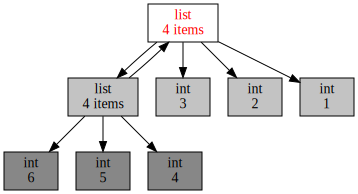

In [23]:
import objgraph

a = [1, 2, 3]
b = [4, 5, 6]

a.append(b)
b.append(a)

objgraph.show_refs([a])
